In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
file_id = "1FsvrUvKYa-A6Ow9koDZCZgzzk3sYYcTJ"
output = "Merged.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1FsvrUvKYa-A6Ow9koDZCZgzzk3sYYcTJ
To: /content/Merged.csv
100%|██████████| 16.8M/16.8M [00:00<00:00, 69.8MB/s]


'Merged.csv'

In [ ]:
df = pd.read_csv("Merged.csv")

df.head(5)

/tmp/ipython-input-1746147884.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Merged.csv")


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,2008,1,5,6,750.0,800,1005.0,1023,FL,627,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
1,2008,4,25,5,1739.0,1745,1946.0,2005,DL,1235,...,26.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
2,2008,3,22,6,1833.0,1845,1953.0,1950,OO,3953,...,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,2008,2,6,3,2054.0,2040,2135.0,2130,MQ,3415,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
4,2008,4,16,3,1358.0,1400,1512.0,1510,WN,527,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               150000 non-null  int64  
 1   Month              150000 non-null  int64  
 2   DayofMonth         150000 non-null  int64  
 3   DayOfWeek          150000 non-null  int64  
 4   DepTime            146731 non-null  float64
 5   CRSDepTime         150000 non-null  int64  
 6   ArrTime            146403 non-null  float64
 7   CRSArrTime         150000 non-null  int64  
 8   UniqueCarrier      150000 non-null  object 
 9   FlightNum          150000 non-null  int64  
 10  TailNum            149255 non-null  object 
 11  ActualElapsedTime  146403 non-null  float64
 12  CRSElapsedTime     149975 non-null  float64
 13  AirTime            146403 non-null  float64
 14  ArrDelay           146403 non-null  float64
 15  DepDelay           146731 non-null  float64
 16  Or

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(150000, 30)

In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,3269
CRSDepTime,0
ArrTime,3597
CRSArrTime,0
UniqueCarrier,0
FlightNum,0


In [ ]:
df.drop(columns = ['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1, inplace = True)

df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,3269
CRSDepTime,0
ArrTime,3597
CRSArrTime,0
UniqueCarrier,0
FlightNum,0


In [ ]:
df.shape

(150000, 24)

In [ ]:
cat_cols = df.select_dtypes(include = ["object"]).columns

for col in cat_cols:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].mode()[0], inplace = True)

/tmp/ipython-input-1639586049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               150000 non-null  int64  
 1   Month              150000 non-null  int64  
 2   DayofMonth         150000 non-null  int64  
 3   DayOfWeek          150000 non-null  int64  
 4   DepTime            146731 non-null  float64
 5   CRSDepTime         150000 non-null  int64  
 6   ArrTime            146403 non-null  float64
 7   CRSArrTime         150000 non-null  int64  
 8   UniqueCarrier      150000 non-null  object 
 9   FlightNum          150000 non-null  int64  
 10  TailNum            150000 non-null  object 
 11  ActualElapsedTime  146403 non-null  float64
 12  CRSElapsedTime     149975 non-null  float64
 13  AirTime            146403 non-null  float64
 14  ArrDelay           146403 non-null  float64
 15  DepDelay           146731 non-null  float64
 16  Or

In [ ]:
df['Cancelled'].value_counts()

,count
Cancelled,
0,146731
1,3269


In [ ]:
add_cols = ["DepDelay", "ArrDelay", "ActualElapsedTime", "AirTime", "ArrTime", "TaxiIn", "Cancelled"]
df.drop(columns=[c for c in add_cols if c in df.columns], inplace = True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
float_cols = df.select_dtypes(include = 'float64').columns.to_list()

print(f"\nThe Float columns that we need to convert are: {float_cols}")

for col in float_cols:
    df[col] = df[col].fillna(0).astype('int64')


The Float columns that we need to convert are: ['DepTime', 'CRSElapsedTime', 'TaxiOut']


In [ ]:
if "Delayed" in df.columns:
  df["Delayed"] = df["Delayed"].map({"Y" : 1, "N" : 0})

df["Delayed"].head()

,Delayed
0,0
1,0
2,1
3,1
4,1


In [ ]:
df["Delayed"].value_counts()

,count
Delayed,
1,82531
0,64196


In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
CRSDepTime,0
CRSArrTime,0
UniqueCarrier,0
FlightNum,0
TailNum,0


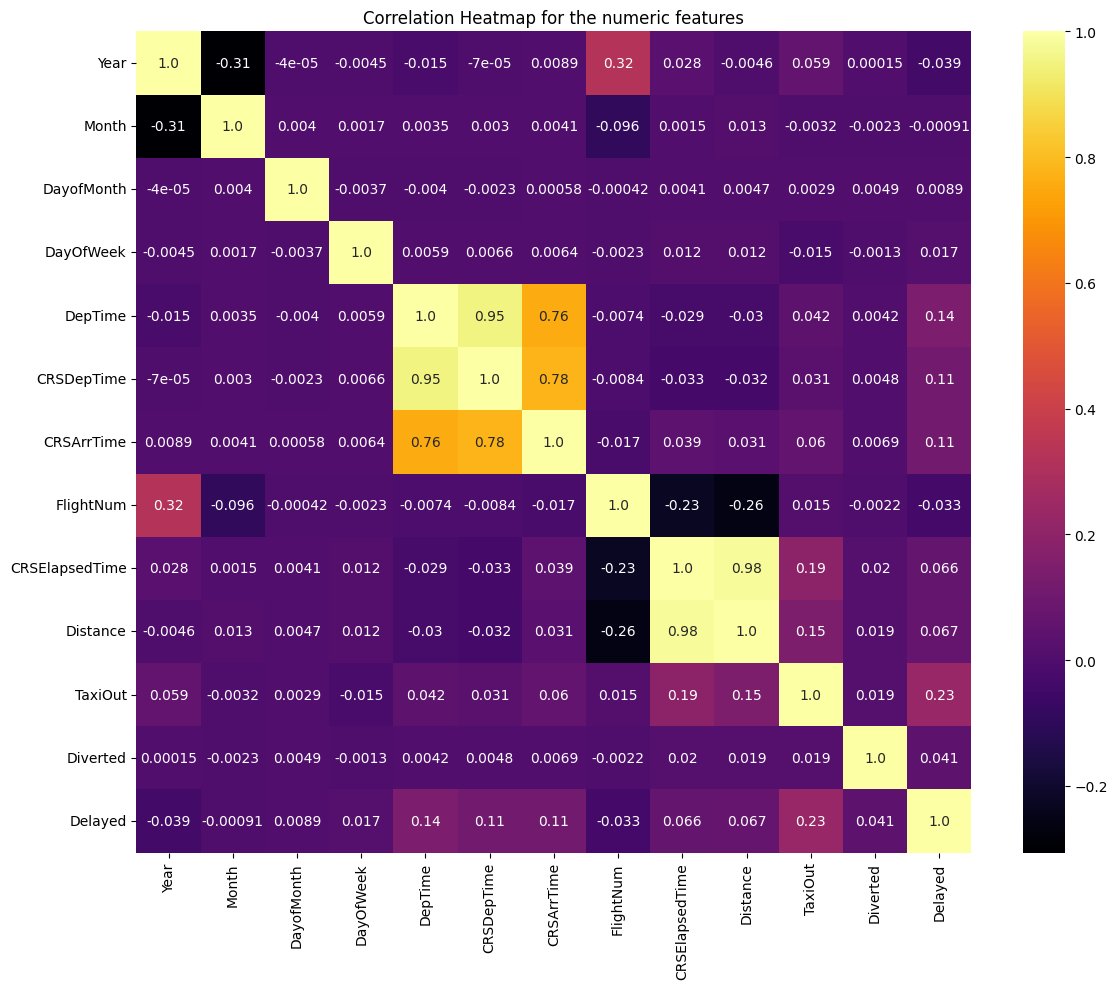

In [ ]:
plt.figure(figsize = (12, 10))

numeric_df = df.select_dtypes(include = [np.number])
sns.heatmap(numeric_df.corr(), cmap = "inferno", annot = True, fmt = ".2")
plt.title("Correlation Heatmap for the numeric features")
plt.tight_layout()
plt.show()

In [ ]:
#Scatterplot for distance in miles compared to time taken

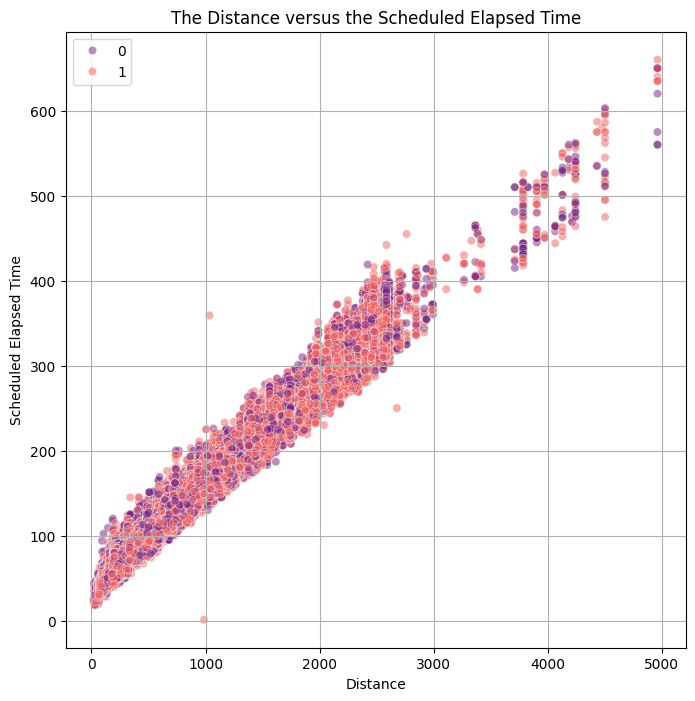

In [ ]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = df, x = "Distance", y = "CRSElapsedTime", hue = "Delayed", palette='magma', alpha = 0.5)
plt.title("The Distance versus the Scheduled Elapsed Time")
plt.xlabel("Distance")
plt.ylabel("Scheduled Elapsed Time")
plt.grid(True)
plt.legend(loc = 0)
plt.show()

In [ ]:
#Countplot

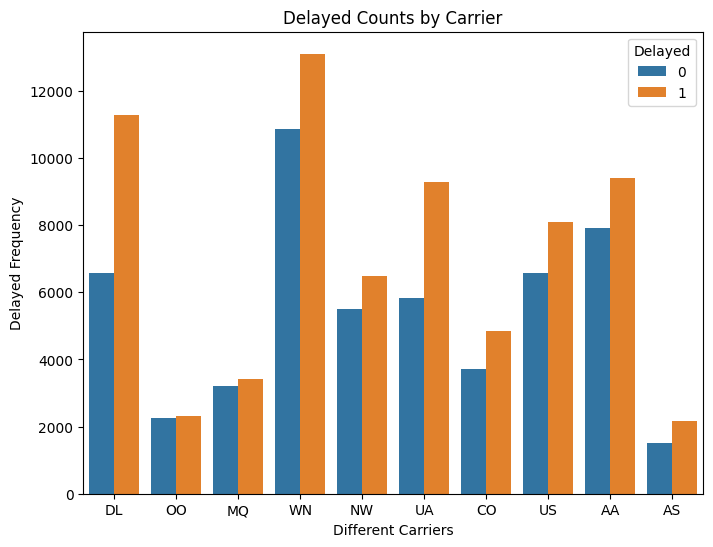

In [ ]:
plt.figure(figsize = (8, 6))

top_carriers = df["UniqueCarrier"].value_counts().index[:10]
sns.countplot(x = "UniqueCarrier", hue = "Delayed", data = df[df["UniqueCarrier"].isin(top_carriers)])
plt.title('Delayed Counts by Carrier')
plt.xlabel("Different Carriers")
plt.ylabel("Delayed Frequency")
plt.show()

In [ ]:
#Pie chart

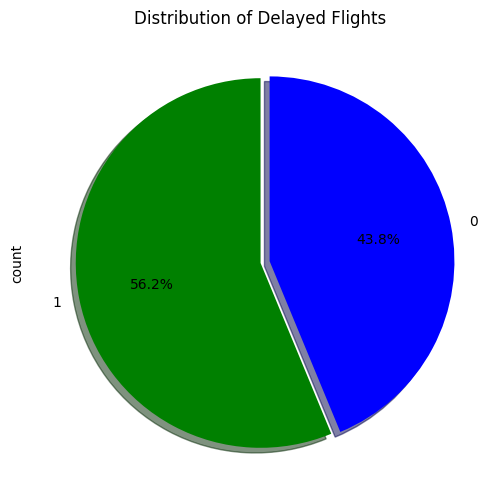

In [ ]:
plt.figure(figsize = (8, 6))


df["Delayed"].value_counts().plot.pie(autopct = '%1.1f%%', colors = ["green", "blue"],
                                                                     startangle = 90, explode = [0, 0.05], shadow = True)
plt.title('Distribution of Delayed Flights')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146727 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            146727 non-null  int64 
 1   Month           146727 non-null  int64 
 2   DayofMonth      146727 non-null  int64 
 3   DayOfWeek       146727 non-null  int64 
 4   DepTime         146727 non-null  int64 
 5   CRSDepTime      146727 non-null  int64 
 6   CRSArrTime      146727 non-null  int64 
 7   UniqueCarrier   146727 non-null  object
 8   FlightNum       146727 non-null  int64 
 9   TailNum         146727 non-null  object
 10  CRSElapsedTime  146727 non-null  int64 
 11  Origin          146727 non-null  object
 12  Dest            146727 non-null  object
 13  Distance        146727 non-null  int64 
 14  TaxiOut         146727 non-null  int64 
 15  Diverted        146727 non-null  int64 
 16  Delayed         146727 non-null  int64 
dtypes: int64(13), object(4)
memory usa

In [ ]:
#Dropping tail num instead of one hot encoding it
#And applying OHE to other features as they have less unique value rather than tail num and also because
#decision trees can handle a wide number of features

In [ ]:
df['TailNum'].nunique()

9980

In [ ]:
df.drop(columns = ["TailNum"], inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [ ]:
encoded_cols = ["UniqueCarrier", "Origin", "Dest"]

df = pd.get_dummies(df, columns = encoded_cols)

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,2008,1,5,6,750,800,1023,627,143,861,...,False,False,False,False,False,False,False,False,False,False
1,2008,4,25,5,1739,1745,2005,1235,140,585,...,False,False,False,False,False,False,False,False,False,False
2,2008,3,22,6,1833,1845,1950,3953,65,291,...,False,False,False,False,False,False,False,False,False,False
3,2008,2,6,3,2054,2040,2130,3415,50,134,...,False,False,False,False,False,False,False,False,False,False
4,2008,4,16,3,1358,1400,1510,527,70,333,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Model Training

In [ ]:
X = df.drop("Delayed", axis = 1)
y = df["Delayed"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

dtree = DecisionTreeClassifier(max_depth = 20, min_samples_split = 30, class_weight = "balanced", random_state = 42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=30, random_state=42)

In [ ]:
dtree_pred = dtree.predict(X_test)

print(f"The accuracy of the Decision Tree is {accuracy_score(y_test, dtree_pred) * 100}")

The accuracy of the Decision Tree is 69.48363206797065


In [ ]:
# Precision Score

print(f"The precision score for the model is {precision_score(y_test, dtree_pred)* 100}")

#Confusion Matrix

print(f"\nThe confusion matrix for the model is {confusion_matrix(y_test, dtree_pred)}")

The precision score for the model is 75.76478119712834

The confusion matrix for the model is [[14017  5300]
 [ 8133 16569]]


In [ ]:
#Confusion Matrix

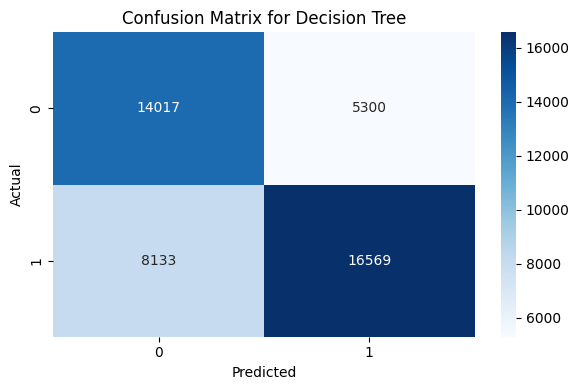

In [ ]:
plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, dtree_pred), annot = True, fmt = "d", cmap = 'Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
#Classification Report for the Decision Tree

print("\nThe Classification Report :")
print(classification_report(y_test, dtree_pred))


The Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     19317
           1       0.76      0.67      0.71     24702

    accuracy                           0.69     44019
   macro avg       0.70      0.70      0.69     44019
weighted avg       0.70      0.69      0.70     44019

